# Data Science Nanodegree Project 1

## Questions: 
1. What is the most popular developer role based on the 2021 survey results. 
2. Is there a difference in proportion of females between the field of data science and the most popular developer role from the 2021 survey results?
3. Have there been changes in the gender and age demographics in the field of data science between 2019 and 2021 survey results?
4. Within the field of data science, is there a difference in job satisfaction, hours worked, salary between male and females? How has this changed between 2019 and 2020 survey results?

## Gather datasets: 
https://insights.stackoverflow.com/survey
- Survey_results 2019 (dfY1)
- Survey_results 2020 (dfY2)
- Survey_results 2021 (dfY3)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

dfY1 = pd.read_csv('./survey_results_public_2019.csv')
dfY2 = pd.read_csv('./survey_results_public_2020.csv')
dfY3 = pd.read_csv('./survey_results_public_2021.csv')

### Section 1: Data exploration / assessment

In [3]:
# Initial look at the data
print("2019 Respondents and questions", dfY1.shape)
print("2020 Respondents and questions", dfY2.shape)
print("2021 Respondents and questions", dfY3.shape)

2019 Respondents and questions (88883, 85)
2020 Respondents and questions (64461, 61)
2021 Respondents and questions (83439, 48)


In [4]:
dfY1['Country'].describe()

count             88751
unique              179
top       United States
freq              20949
Name: Country, dtype: object

#### Section 1 Findings: 
1. From 2019 to 2021, the number of questions included in the survey decreased as indicated by the reduced number of rows (85 in 2019 to 41 in 2021). 
2. Between 2019 and 2021, the number of respondents decreased by 6.1 % from 88,877 to 83,438, and 2020 had the lowest number of respondents at 64,446. 
3. The maximum percentage of answers to a single questions was 78.8 %, meaning that there will be missing values that will need to appropriately handled regardless of the question we are interested in.

### Section 2: Answering questions

#### Section 2, Question 1: What is the most popular developer role in 2021. 
1. Remove the empty rows for DevType and Gender. Note in 2021, 'Prefer not to say' was an answer to gender choice. Respondents who selected this answer were also removed.
2. Determine the most popular developer role. 

In [5]:
def del_miss_devgen(df):
    '''
    Description: Remove rows with missing developer role and gender. 
    
    Input: Dataframe.
    
    Output: Dataframe with missing role and gender information removed.
    
    '''
    df.dropna(subset=['DevType', 'Gender'], axis=0, how='any', inplace=True)

In [6]:
# Apply del_miss_devgen function to all three dataframes.
dfs = [dfY1, dfY2, dfY3]

for df in dfs:
    del_miss_devgen(df)

In [7]:
# 2021 survey included 'prefer not to say' as an option for the question 'Which of the following (genders) describe you, if any?'
# Prefer not to say is essentially the same as not answering the question so it was treated as a missing answer and dropped.
dfY3['Gender']=dfY3['Gender'].replace(['Prefer not to say'], np.nan)

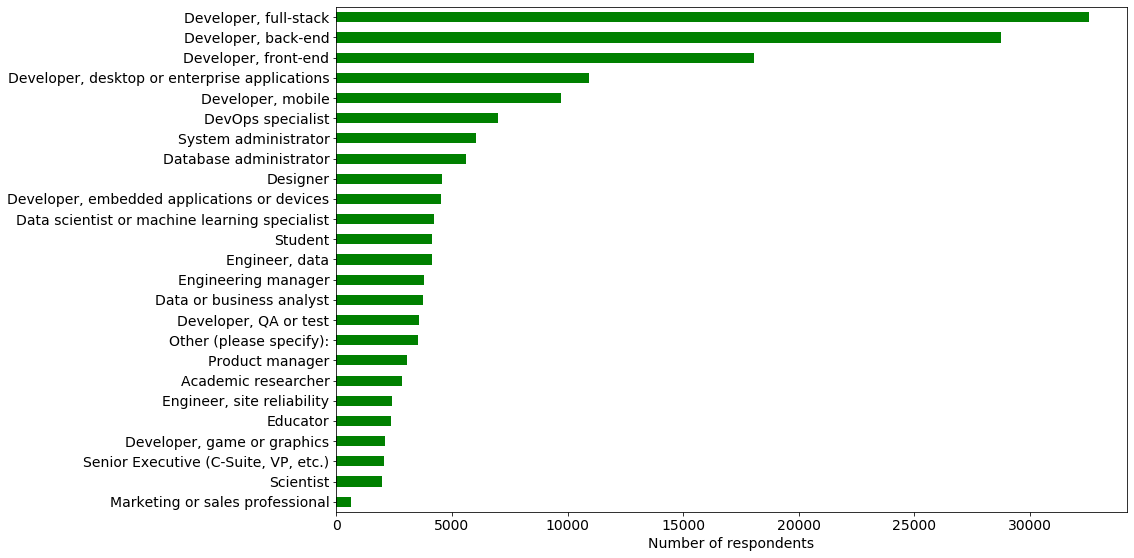

In [49]:
# Plot of frequency of developer roles to determine which role was most popular in 20201. 
fig, ax = plt.subplots(figsize=(16,8), tight_layout=True);
(dfY3.DevType.str.get_dummies(';').stack().sum(level=1)).sort_values(ascending=True).plot(kind='barh', color='green', ax=ax);
plt.xlabel('Number of respondents', fontsize=14);
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('DeveloperDist.png', dpi=500);

##### Answer to Question 1: Full-stack developer was the most popular role in 2021.

#### Section 2, Question 2: Is there a difference in proportion of females in the field of data science and full-stack developers in 2021?

Approach: Find the proportion of males, females and non-binary in the most popular developer role and data science role:
1. Add a new gendery category column so that there is one category per respondent.
2. Add columns for each developer role and include a boolean to indicate which roles each respondent serves as.
3. Create a data scientist dataframe by filtering extended dataframe (described in 2). 
4. Determine the proportion of male, female and non-binary people who are data scientist. 
5. Repeat steps 3 and 4 for full-stack developers.

In [9]:
def clean_gender(gender):
    '''
    Description: Separates the answers given for gender as the respondents could select multiple answers.
    
    Input - gender.
    Output - gender category:
              - NB if respondent answered more than one gender or non-binary
              - Man if respondent answered only Man 
              - Woman if respondent answered only Woman
    '''
    if gender not in ['Man', 'Woman']:
        return 'NB'
    else:
        return gender

In [10]:
# Apply clean_gender function to all three dataframes.
dfs = [dfY1, dfY2, dfY3]

for df in dfs:
    df['Gender_cat'] = df['Gender'].apply(clean_gender)

In [11]:
def get_dev_type(df):
    '''
    Description: Respondents were allowed to select multiple developer roles and the answers appeared within the 
                 row separated by semi-colons (;) so these needed to be separated. Dummy variables created for each 
                 role and a new column created with a boolean input that indicates if 
                 the respondent identified as having a specific role.
                 
    Input: Dataframe.
    
    Output: Modified dataframe with additional columns for each data type with boolean for if individual identified as each developer type.
    '''
    df_dt = df['DevType'].str.get_dummies(';')
    df = pd.concat([df_dt, df], axis=1)
    
    return df

In [12]:
def dev_type_df(dfs, role):
    '''
    Description: For each dataframe in a list of dataframes, apply the get_dev_type function, to determine all 
                 the roles that each respondent serves as. Then check if a respondent functions in a specific role 
                 and if so, put the respondent data in a new dataframe which will be appeneded to a list of dataframes 
                 (df_dt) which can then be unpacked. 
    
    Input: - List of dataframes(dfs).
           - Specific role (role).
    
    Output: - List of dataframes. Each dataframe contains data of respondents that serve as a specific role. 
    '''
    df_dt = []
    
    for df in dfs: 
        df = get_dev_type(df)
        df_dt.append(df[(df[role] == 1)])
        
    return df_dt

In [13]:
# Produce data scientist (ds) and full stack developers (devfs) dataframes for each year (Y1, Y2, Y3) uing dev_type function.
dsY1, dsY2, dsY3 = dev_type_df(dfs, role='Data scientist or machine learning specialist')
devfsY1, devfsY2, devfsY3 = dev_type_df(dfs, role='Developer, full-stack')

In [14]:
# Compute the proportion of males, females and non-binary data scientist.
print('Proportion of male, female and NB data scientist in 2021:') 
print(dsY3['Gender_cat'].value_counts(normalize=True))

Proportion of male, female and NB data scientist in 2021:
Man      0.907346
Woman    0.054265
NB       0.038389
Name: Gender_cat, dtype: float64


In [15]:
# Compute the proportion of males, females and non-binary full-stacke developers.
print('Proportion of male, female and NB full-stack developers in 2021:') 
devfsY3['Gender_cat'].value_counts(normalize = True)

Proportion of male, female and NB full-stack developers in 2021:


Man      0.930438
Woman    0.038758
NB       0.030804
Name: Gender_cat, dtype: float64

##### Answer to Question 2: In 2021, there is a larger percentage of female data scientist than female full-stack developers (1.4 times)

#### Section 2, Question 3: Have there been changes in the gender and age demographics in the field of Data Science between 2019 and 2021?

#### Gender

In [16]:
def plot_gen(df, year,color):
    '''
    Description: Visualise the proportion of male, female and non-binary people in a 
                 specific dataframe for a specific year.
    
    Input: - Dataframe (df).
           - Year coresponding to data in dataframe (year).
           - Color to plot the data with (color).
    
    Output: Plot of the proportion of male, female and non-binary people in the dataframe.
    '''
    df['Gender_cat'].value_counts(normalize=True).plot(kind='bar',color=color)
    plt.title(year)
    plt.xlabel('Gender')
    plt.ylabel('Proportion')
    plt.show()
    return 

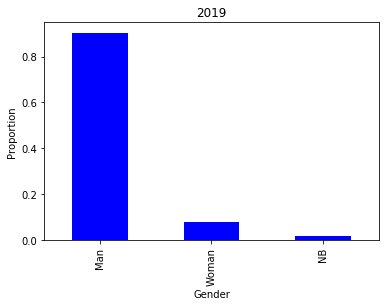

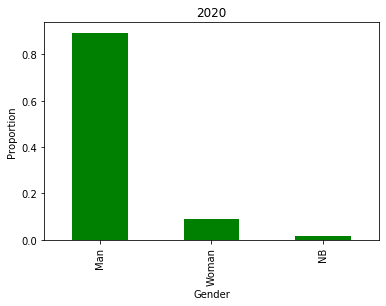

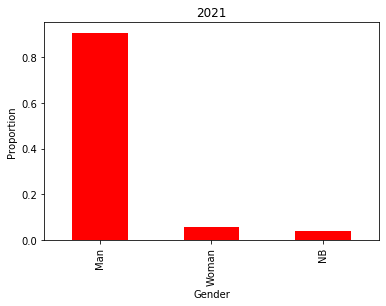

In [17]:
# Apply plot_gen function to all three data scientist dataframes (dsY1, dsY2, dsY3) to visualise the 
# proportion of male, female and NB data scientist in 2019 - 2021.
dfs = [dsY1, dsY2, dsY3]
year = [2019, 2020, 2021]
color = ['blue', 'green', 'red']
for ds, year, color in zip (dfs,year,color):
    plot_gen(ds, year,color)

Answer : Between 2019 and 2020, the proportion of female data scientist increased from 7.8 % to 8.9 % but fell to 5.5 % in 2021. These surveys were taken in the first half of the year so it is likely representative of the previous year. The decrease between 2020 and 2021 was probably representative of that for the years 2019 to 2020 during which it has been shown generally that a higher proportion of females left their jobs during the first year of the pandemic. 

#### Age

In [18]:
bins = pd.IntervalIndex.from_tuples([(0, 17), (18, 24), (25, 34),(34,44), (45,54),(55, 64),(65,100)])


def agebin_plot(df, bins, year, color, plot=True):
    '''
    Description: Takes the ages of respondents, determines age group (i.e age bin) to which they belong, puts the age group in the new column age bins.
                 Plots age distribution of respondents. 
    
    Input: Dataframe and bins which the ages will be placed.
    
    Output: Dataframe with additional Agebins column and age distribution plot
    '''
    # Add Agebins column
    df.loc[:, 'Agebins'] = pd.cut(df['Age'], bins);
    
    # Plot
    if plot:
        (df['Agebins'].value_counts(normalize=True)).plot(kind='bar', color=color);
        plt.title(year);
        plt.show()
    return df

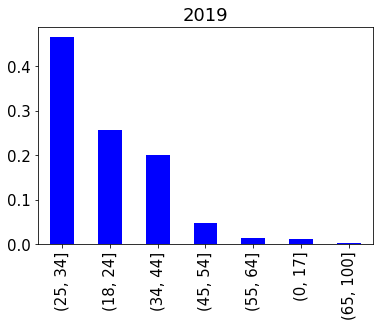

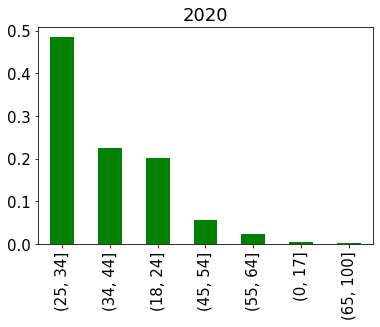

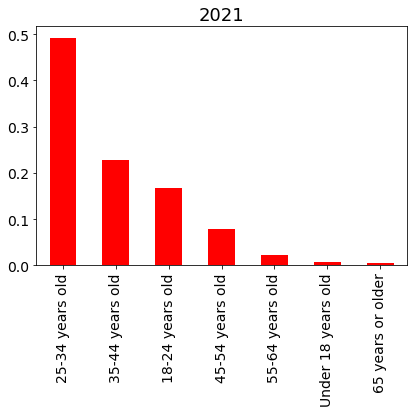

In [50]:
# Apply agebin_plot function to data scientist dataframe for 2019 and 2020. 
# This was not applied to 2021 since the age data was stored within agebins when the data was collected. 
bins = pd.IntervalIndex.from_tuples([(0, 17), (18, 24), (25, 34),(34,44), (45,54),(55, 64),(65,100)])

ds_dfs = [dsY1, dsY2]
years = [2019, 2020]
colors = ['blue', 'green']

for ds, year, color in zip (ds_dfs, years, colors):
    agebin_plot(ds, bins, year, color,plot=True)

# Remove 'Prefer not to say' as an age category by replacing it with NaN then dropping any NaN 
fig, ax = plt.subplots(figsize=(6,6), tight_layout=True);

dsY3_age = dsY3['Age'].replace(['Prefer not to say'], np.nan)
(dsY3_age.dropna(axis=0).value_counts(normalize=True)).plot(kind='bar', color='red',ax=ax)
plt.title(2021)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('OverallAgeDist2021.png', dpi=500)
plt.show()

Findings: for the years 2019 - 2021, the largest proportion of respondents were 25 - 34 years old. In 2020 - 2021, 35 - 44 year olds were the second largest age group.

In [20]:
def get_gen_df(df, gender):
    '''
    Description: Make a new dataframe which contains the data corresponding only to the male, female or 
                 non-binary respondents. Produced by filtering the dataframe by the entry in the gender 
                 category column. 
    
    Input: - Dataframe from which the new dataframe will be produced (df).
           - Gender of interest (gender).
    
    Output: Dataframe containing data of only the respondents of the specific gendery category (df_w).
    '''
    df_w = df.loc[df['Gender_cat'] == gender]
    
    return df_w

In [34]:
# Apply get_gen_df to data scientist dataframe to produce dataframe that has data for only the women data scientist (dsYx_w).
ds_dfs = [dsY1, dsY2, dsY3]
ds_w = []

for ds in ds_dfs:
    ds_w.append(get_gen_df(ds,'Woman'))
    
dsY1_w, dsY2_w, dsY3_w = ds_w

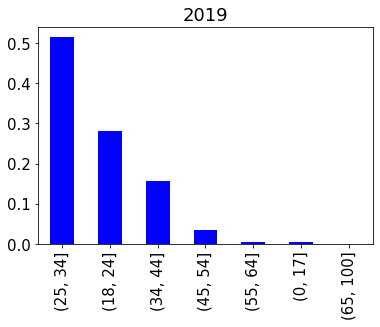

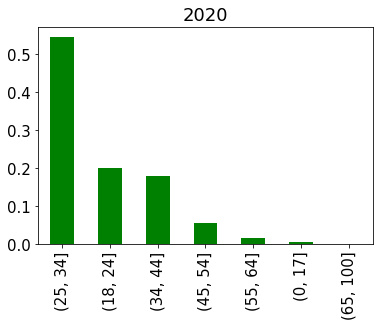

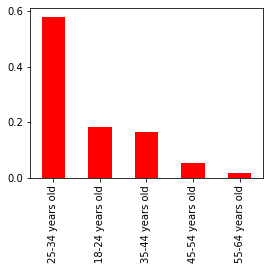

In [57]:
# Apply agebin_plots to dsYx_w (i.e. df with women data scientist data) for 2019-2020 
# This was not applied to 2021 since the age data was stored within agebins when the data was collected. 
ds_w = [dsY1_w, dsY2_w]
for ds, year, color in zip(ds_w, years, colors):
    agebin_plot(ds, bins, year, color,plot=True);

fig, ax = plt.subplots(figsize=(4,4), tight_layout=True);

dsY3_w['Age'].value_counts(normalize=True).plot(kind='bar', color='red', ax=ax)
#plt.title('Age proportions of Female Data Scientist 2021', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('WomenAgeDist2021.png', dpi=500)
plt.show()

##### Answer to Question 3:
- For 2019 - 2021, between 51 and 59 % of the females were in ages 25 - 34 years old and the proportion in this age group increased year on year. 
- The second highest age group was 18 - 24 at around 18 - 29 % but decreased by 10 % points between 2019 and 2021. It is probale that some of the people in the 18 - 24 age group were adding to the 25 - 34 group, but it also suggests that the number of females pursuing a career in data science is decreasing. 
- Interestingly, the second highest age group (of all paritcipants) was 35 - 44 years rather than 18 - 24 year olds.

#### Question 4 : Within the field of data science, is there a difference in job satisfaction, hours worked, salary between male and females? how has this changed betweem 2019 and 2020.

##### Comparison of Job satisfaction amongst genders for 2019 and 2020

In [36]:
def convert_jobsat(jobsat):
    '''
    Description: Produce numerical score from corresponding categorical response to job satisfaction.
    
    Input: Job satisfaction entry (jobsat).
    
    Output: Job satifaction 1-10.
    '''
    if jobsat == 'Very satisfied':
        return 10 
    elif jobsat == 'Slightly satisfied':
        return 7 
    elif jobsat == 'Neither satisfied nor dissatisfied':
        return 5
    elif jobsat == 'Slightly dissatisfied':
        return 3
    elif jobsat == 'Very dissatisfied':
        return 0

In [43]:
# Apply convert_jobsat function to data scientist dataframs for 2019-2020.
# Plot job satisfaction data by gender category for 2019-2020
# Job satisfaction data was not collected in the 2021 survey.
dfs = [dsY1, dsY2]
year = [2019, 2020, 2021]
colors = ['blue', 'green', 'red']

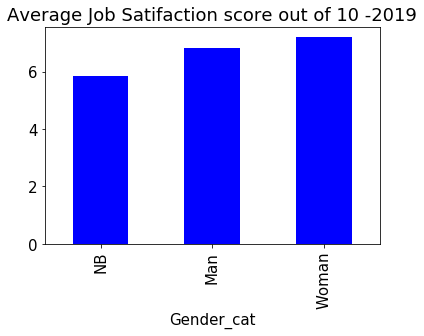

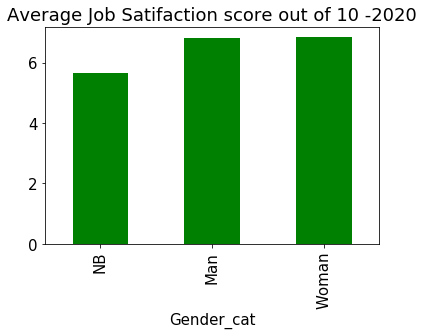

In [44]:
for df, year, color, in zip(dfs, year, colors):
    df.loc[:, 'JobSat_mod'] = df['JobSat'].apply(convert_jobsat)
    df.groupby(['Gender_cat']).mean()['JobSat_mod'].sort_values().plot(kind='bar',color=color);
    plt.title('Average Job Satifaction score out of 10 -' + str(year))
    plt.show()

##### Answer to Question 4 (part 1: job satisfaction):
- Job satisfaction: Women have, on average, reported higher job satisfaction than men; in 2019, Women were around 6 % more satified than men. From the survey results in 2020, the differnce in average job satifaction decreased. Non-binary respondents reported the lowest average job satifaction, around 16 % less than average satifisfaction reported by men in 2020. 
- Note: a numerial value was not given for job satisfaction, categories were given, which were then coverted to numerical values here.


##### Comparison of hours worked and compensation amongst genders for 2019 and 2020

In [45]:
def boxplot_gen(df, column, title, limit, scale='linear', ax=None):
    '''
    Description: Visualise the weekly working hours and total compensation by gender category. 
                 Boxplot used instead of bar chart of means since the distribution of total compensation was 
                 heavily skewed. This allowed comparison of the median and interquartile ranges of the data 
                 as well as the outliers if any.
                 A box plot was not necessary for the weekly working hour distribution since the data was not 
                 right or left skewed.
                 The outliers were removed before producing the boxplots. 
    
    Input: - Dataframe (df)
           - Column either weekly working hours or total compensation (column)
           - Title to identify which variable and for which year the boxplot represents (title)
           - Limit was used to enforce the highest possible entry for weekly working hours or compensation
           - Scale to plot as linear or log, log would be required for compensation as it may vary by orders of magnitude          
    
    Output: Boxplots of variables by gender category
    '''
    df = df[df[column] < limit]
    #fig, ax = plt.subplots(figsize=(10,5))
    df.boxplot(column=[column], by='Gender_cat', ax=ax, showmeans=True)
  
    if scale == 'log':
        ax.set_yscale('log');
    ax.set_title(title)

In [46]:
# Apply boxplot_gen function to data scientist dataframes for 2019-2020 to visualise WorkWeekHrs and CompTotal
# by gender category for 2019-2020. 
# Working hours per week and salary data were not collected in the 2021 survey.
dfs = [dsY1, dsY2]
years = [2019, 2020, 2021]
columns = ['WorkWeekHrs', 'CompTotal']
limits = [90, 1e+9]
scales = ['linear', 'log']

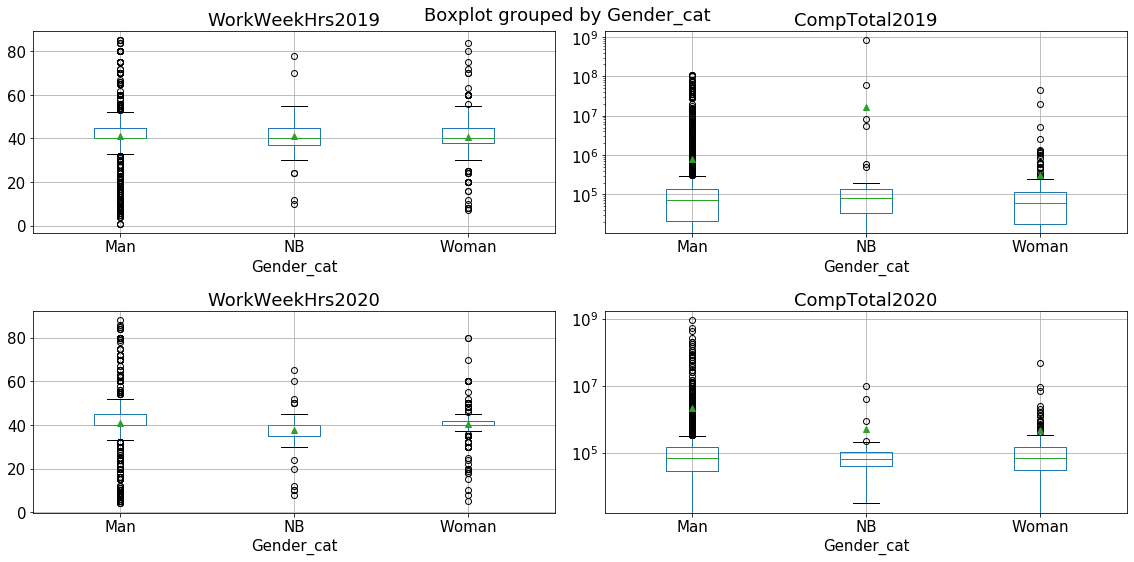

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,8), tight_layout=True);
axes = axes.flat

for df, year in zip(dfs, years):
    for column, limit, scale in zip(columns, limits, scales):
            boxplot_gen(df, column, str(column)+str(year), limit, scale, ax=next(axes))
            plt.rcParams.update({'font.size': 15})

plt.savefig('VarsGen.png', dpi=500)

##### Answer to Question 4 (part 2: hours worked): 
- In 2019, men and women worked similar average hours per week (42 hours +/- 2 hours). From the average number of hours, non-binary respondents worked around 5 hours longer than men and women but the deviation is 22.6 hours.
- In 2020, men, women and people who identified as nb worked on average 40 - 42 hours with non-binary respondents working the longest.
- Note: the average weekly hours worked (shown by the green triangle) were almost equal to the median values.

In [48]:
print('Compensation Total 2019')
print(dsY1.groupby(['Gender_cat']).median()['CompTotal'])

print('Compensation Total 2020')
print(dsY2.groupby(['Gender_cat']).median()['CompTotal'])

Compensation Total 2019
Gender_cat
Man      70000.0
NB       80000.0
Woman    62000.0
Name: CompTotal, dtype: float64
Compensation Total 2020
Gender_cat
Man      71000.0
NB       63500.0
Woman    70000.0
Name: CompTotal, dtype: float64


##### Answer to Question 4 (part 3: compensation):

- In 2019, based on the compensation means, men were on average paid almost 10 times that of women but the deviaion in women salaries were larger than the average. The distribution of salaries was however very skewed with a long tail. Instead of using the mean, the median was therefore used which showed that men were still paid more than women and NB paid more than men. Boxplots were therefore more appropriate to visualise compensation data.
- In 2020, the compensation gap between men and women decreased from almost 8k to 1k. 